In [1]:
import requests
from bs4 import BeautifulSoup
import mysql.connector
from mysql.connector import errorcode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Establish connection with SQL

cnx = mysql.connector.connect(
        host = "forlocalsonly.cx3latsxfbtx.us-east-2.rds.amazonaws.com",
        user = "Lefty",
        passwd = "sn0wflak3",
        database = "TV",
        port="3306"
)
cursor = cnx.cursor()

In [5]:
db_name = "TV"

In [558]:
#Create Database in SQL

cursor.execute("CREATE DATABASE {} DEFAULT CHARACTER SET 'utf8'".format(db_name))
cursor.close()
cnx.close()

NameError: name 'db_name' is not defined

In [416]:
cursor.close()
cnx.close()

In [479]:
#Create Table in TV Database
TABLES = {};
TABLES["Popular"] = ("""
      CREATE TABLE Popular (
      ID int(3) NOT NULL UNIQUE AUTO_INCREMENT,
      title varchar(50) NOT NULL,
      rating varchar(8) NOT NULL,
      time varchar(8) NOT NULL,
      date int(6) NOT NULL,
      GENRE1 varchar(15) NOT NULL,
      GENRE2 varchar(15) NOT NULL,
      score float(3) NOT NULL,
      user_votes int(8) NOT NULL,
      PRIMARY KEY (ID)
      )
""")

In [480]:
cursor.execute(TABLES["Popular"])

In [2]:

page = requests.get("https://www.imdb.com/chart/toptv/?ref_=nv_tp_tv250_2")
soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
hungry = {'title': ember[0],
                        'rating': ember[2],
                        'time': ember[3],
                        'date': int(ember[1]),
                        'Genre': [ember[4], ember[4]]}

In [3]:
soup.find_all(class_="ratingColumn imdbRating")[0]

<td class="ratingColumn imdbRating">
<strong title="9.5 based on 80,798 user ratings">9.5</strong>
</td>

In [139]:
#create list of top tv shows

show_list = []
for elem in soup.find_all(class_="titleColumn"):
    shows = elem.text.replace("\n", "")
    showss = shows.replace("  ", "")
    show_list.append(showss.split(".")[1])

In [140]:
show_list

['Planet Earth II(2016)',
 'Planet Earth(2006)',
 'Band of Brothers(2001)',
 'Chernobyl(2019)',
 'Breaking Bad(2008)',
 'Blue Planet II(2017)',
 'The Wire(2002)',
 'Game of Thrones(2011)',
 'Our Planet(2019)',
 'Cosmos(2014)',
 'Cosmos(1980)',
 'Rick and Morty(2013)',
 'Avatar: The Last Airbender(2005)',
 'The Sopranos(1999)',
 'The World at War(1973)',
 'Life(2009)',
 'Sherlock(2010)',
 'The Vietnam War(2017)',
 'Fullmetal Alchemist: Brotherhood(2009)',
 'The Beatles Anthology(1995)',
 'The Twilight Zone(1959)',
 'Human Planet(2011)',
 'The Blue Planet(2001)',
 'Firefly(2002)',
 'Batman: The Animated Series(1992)',
 'Dekalog(1989)',
 'Frozen Planet(2011)',
 'True Detective(2014)',
 'The Civil War(1990)',
 'Death Note(2006)',
 'Fargo(2014)',
 'Apocalypse: La 2ème guerre mondiale(2009)',
 'When They See Us(2019)',
 'Sahsiyet(2018)',
 'Cowboy Bebop(1998)',
 'Africa(2013)',
 'Last Week Tonight with John Oliver(2014)',
 'TVF Pitchers(2015)',
 'Only Fools and Horses',
 'Friends(1994)',
 "Mo

In [153]:
#drop the dates off the shows
titles = []
for value in show_list:
    titles.append(value.split("(")[0])
    
titles

['Planet Earth II',
 'Planet Earth',
 'Band of Brothers',
 'Chernobyl',
 'Breaking Bad',
 'Blue Planet II',
 'The Wire',
 'Game of Thrones',
 'Our Planet',
 'Cosmos',
 'Cosmos',
 'Rick and Morty',
 'Avatar: The Last Airbender',
 'The Sopranos',
 'The World at War',
 'Life',
 'Sherlock',
 'The Vietnam War',
 'Fullmetal Alchemist: Brotherhood',
 'The Beatles Anthology',
 'The Twilight Zone',
 'Human Planet',
 'The Blue Planet',
 'Firefly',
 'Batman: The Animated Series',
 'Dekalog',
 'Frozen Planet',
 'True Detective',
 'The Civil War',
 'Death Note',
 'Fargo',
 'Apocalypse: La 2ème guerre mondiale',
 'When They See Us',
 'Sahsiyet',
 'Cowboy Bebop',
 'Africa',
 'Last Week Tonight with John Oliver',
 'TVF Pitchers',
 'Only Fools and Horses',
 'Friends',
 "Monty Python's Flying Circus",
 'Das Boot',
 'Hunter x Hunter',
 'Black Mirror',
 'Pride and Prejudice',
 'Seinfeld',
 'Pew News',
 'The Office',
 'Gravity Falls',
 'One Punch Man',
 'Over the Garden Wall',
 'Stranger Things',
 'Twin Pe

In [4]:
#create a list of the ratings for the shows

imdbrating = []
for rating in soup.find_all(class_="ratingColumn imdbRating"):
    score = rating.text.replace("\n", "")
    imdbrating.append(float(score))
    

In [5]:
imdbrating

[9.5,
 9.4,
 9.4,
 9.4,
 9.4,
 9.3,
 9.3,
 9.3,
 9.3,
 9.2,
 9.2,
 9.2,
 9.2,
 9.1,
 9.1,
 9.1,
 9.1,
 9.1,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 8.9,
 8.9,
 8.9,
 8.9,
 8.9,
 8.9,
 8.9,
 8.9,
 8.9,
 8.9,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5

In [499]:
#create a list showing the amount of people who voted for a show

popularity = []
for rating in soup.find_all(class_="ratingColumn imdbRating"):
    pop = rating.find('strong')['title'].replace(" based on ", ",")
    popular = pop.replace(" user ratings", "")
    pops = popular[4:]
    cool = pops.replace(",", "")
    popularity.append(int(cool))
    

In [500]:
popularity

[80770,
 154058,
 335657,
 376508,
 1274105,
 24261,
 254665,
 1600713,
 18431,
 100438,
 32808,
 296987,
 200472,
 263338,
 19478,
 35270,
 731856,
 14155,
 95904,
 5937,
 63913,
 21482,
 29956,
 230697,
 78167,
 19215,
 23585,
 456910,
 11752,
 195451,
 284877,
 7630,
 51287,
 16037,
 78526,
 12335,
 70661,
 45924,
 42267,
 711141,
 61840,
 23371,
 38815,
 358659,
 69654,
 232328,
 318509,
 57610,
 11983,
 93041,
 31186,
 673196,
 158969,
 308812,
 236047,
 99297,
 14970,
 121015,
 44720,
 260893,
 78257,
 439415,
 10575,
 144229,
 364863,
 5526,
 37020,
 48652,
 175371,
 130053,
 83165,
 57495,
 60423,
 104288,
 35157,
 50732,
 14624,
 13170,
 84260,
 7138,
 6093,
 34558,
 15139,
 6994,
 18270,
 147515,
 112783,
 88401,
 340957,
 308944,
 18133,
 385590,
 9436,
 88874,
 144110,
 42761,
 261860,
 128818,
 81955,
 102791,
 5192,
 5743,
 87305,
 57966,
 6362,
 67191,
 148241,
 56332,
 18953,
 24835,
 62269,
 127493,
 39877,
 6344,
 186686,
 28633,
 184395,
 51272,
 63097,
 89693,
 6092

In [652]:
#create a list of dictionaries, combining all 3 lists
#TV show title, Rating from IMDB, and user votes

popular = []
for shw, score, user in zip(toolive, imdbrating, popularity):
    show_lists = {'title':shw['title'],
                  'rating': shw['rating'],
                  'time': shw['time'],
                  'date': shw['date'],
                  'genre1': shw['Genre'][0],
                  'genre2': shw['Genre'][1],
                 'score': score,
                 'user_votes': user}
    popular.append(show_lists)

In [650]:
popular


[{'title': 'PlanetEarthII',
  'rating': 'TVG',
  'time': '4h58min',
  'date': 2016,
  'genre1': 'Documentary',
  'genre2': 'Documentary',
  'score': 9.5,
  'user_votes': 80770},
 {'title': 'PlanetEarth',
  'rating': 'TVPG',
  'time': '8h58min',
  'date': 2006,
  'genre1': 'Documentary',
  'genre2': 'Documentary',
  'score': 9.4,
  'user_votes': 154058},
 {'title': 'BandofBrothers',
  'rating': 'TVMA',
  'time': '9h54min',
  'date': 2001,
  'genre1': 'Action',
  'genre2': 'Drama',
  'score': 9.4,
  'user_votes': 335657},
 {'title': 'Chernobyl',
  'rating': 'TVMA',
  'time': '5h30min',
  'date': 2019,
  'genre1': 'Drama',
  'genre2': 'History',
  'score': 9.4,
  'user_votes': 376508},
 {'title': 'BreakingBad',
  'rating': 'TVMA',
  'time': '49min',
  'date': 2008,
  'genre1': 'Crime',
  'genre2': 'Drama',
  'score': 9.4,
  'user_votes': 1274105},
 {'title': 'BluePlanetII',
  'rating': 'TVG',
  'time': '6h4min',
  'date': 2017,
  'genre1': 'Documentary',
  'genre2': 'Documentary',
  'scor

In [653]:
# import popular into SQL
tvshow = []
for tvshw in popular:
    tvshw_tuple =(tvshw['title'], tvshw['rating'], tvshw['time'], tvshw['date'], tvshw['genre1'], tvshw['genre2'], tvshw['score'], tvshw['user_votes'])
    tvshow.append(tvshw_tuple)

insert_query = """
INSERT INTO Popular (title, rating, time, date, genre1, genre2, score, user_votes) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
"""

cursor.executemany(insert_query, tvshow)
cnx.commit()
cnx.close()

In [437]:
#Create Table in TV Database
TABLES = {};
TABLES["Movies"] = ("""
      CREATE TABLE Movies (
      ID int(3) NOT NULL UNIQUE AUTO_INCREMENT,
      title varchar(50) NOT NULL,
      rating varchar(10) NOT NULL,
      time varchar(10) NOT NULL,
      date int(8) NOT NULL,
      GENRE1 varchar(10) NOT NULL,
      GENRE2 varchar(10) NOT NULL,
      score float(3) NOT NULL,
      votes int(10) NOT NULL,
      PRIMARY KEY (ID)
      )
""")

In [440]:
cursor.execute(TABLES["Movies"])

In [441]:
train = []
for bus, car in zip(moviez, pikachu):
    mv_tuple =(bus['title'], bus['rating'], bus['time'], bus['date'], bus['Genre'][0], bus['Genre'][1], car['score'], car['votes'])
    train.append(mv_tuple)

insert_query = """
INSERT INTO Movies (title, rating, time, date, GENRE1, GENRE2, score, votes) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
"""

cursor.executemany(insert_query, train)
cnx.commit()
cnx.close()

In [501]:
soup.find_all(class_="ratingColumn imdbRating")[0]

<td class="ratingColumn imdbRating">
<strong title="9.5 based on 80,770 user ratings">9.5</strong>
</td>

In [6]:
url_list = []
for urls in soup.find_all(class_="titleColumn"):
    url_list.append('https://www.imdb.com' + urls.find('a')["href"])

In [503]:
url_list

['https://www.imdb.com/title/tt5491994/',
 'https://www.imdb.com/title/tt0795176/',
 'https://www.imdb.com/title/tt0185906/',
 'https://www.imdb.com/title/tt7366338/',
 'https://www.imdb.com/title/tt0903747/',
 'https://www.imdb.com/title/tt6769208/',
 'https://www.imdb.com/title/tt0306414/',
 'https://www.imdb.com/title/tt0944947/',
 'https://www.imdb.com/title/tt9253866/',
 'https://www.imdb.com/title/tt2395695/',
 'https://www.imdb.com/title/tt0081846/',
 'https://www.imdb.com/title/tt2861424/',
 'https://www.imdb.com/title/tt0417299/',
 'https://www.imdb.com/title/tt0141842/',
 'https://www.imdb.com/title/tt0071075/',
 'https://www.imdb.com/title/tt1533395/',
 'https://www.imdb.com/title/tt1475582/',
 'https://www.imdb.com/title/tt1877514/',
 'https://www.imdb.com/title/tt1355642/',
 'https://www.imdb.com/title/tt0111893/',
 'https://www.imdb.com/title/tt0052520/',
 'https://www.imdb.com/title/tt1806234/',
 'https://www.imdb.com/title/tt0296310/',
 'https://www.imdb.com/title/tt030

In [7]:
genre = []
for url in url_list:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    genre.append(soup.find(class_='title_wrapper').get_text())

ConnectionError: HTTPSConnectionPool(host='www.imdb.com', port=443): Max retries exceeded with url: /title/tt0096548/ (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x1249b0438>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [505]:
genre[0]

'\nPlanet Earth II\xa0            \n\n                    TV-G\n    | \n                        4h 58min\n                    \n|\nDocumentary\n|\nTV Mini-Series (2016)\n \n'

In [638]:
middle = []
for everything in genre:
    everything = everything.replace("  ", "")
    everything = everything.replace("\n", "$")
    everything = everything.replace("\xa0", "$")
    everything = list(everything.split("$"))
    middle.append(everything)

In [639]:
len(middle)

250

In [640]:
clean_up = []
for things in middle:
    clean = []
    for stuff in things:
        if len(stuff) >= 1:
            truth = ''.join(re.findall("\w", stuff))
            clean.append(truth)
        else:
            continue
    clean_up.append(clean)

In [641]:
for zeus in clean_up:
    for herc in zeus:
        if len(herc) == 0:
            zeus.remove(herc)
print(clean_up)

[['PlanetEarthII', 'TVG', '4h58min', 'Documentary', 'TVMiniSeries2016'], ['PlanetEarth', 'TVPG', '8h58min', 'Documentary', 'TVMiniSeries2006'], ['BandofBrothers', 'TVMA', '9h54min', 'Action', 'Drama', 'History', 'TVMiniSeries2001'], ['Chernobyl', 'TVMA', '5h30min', 'Drama', 'History', 'Thriller', 'TVMiniSeries2019'], ['BreakingBad', 'TVMA', '49min', 'Crime', 'Drama', 'Thriller', 'TVSeries20082013'], ['BluePlanetII', 'TVG', '6h4min', 'Documentary', 'TVMiniSeries20172018'], ['TheWire', 'TVMA', '59min', 'Crime', 'Drama', 'Thriller', 'TVSeries20022008'], ['GameofThrones', 'TVMA', '57min', 'Action', 'Adventure', 'Drama', 'TVSeries20112019'], ['OurPlanet', 'TVG', '6h43min', 'Documentary', 'TVMiniSeries2019'], ['Cosmos', 'TVPG', '9h17min', 'Documentary', 'TVSeries2014'], ['Cosmos', 'TVPG', '1h', 'Documentary', 'TVSeries1980'], ['RickandMorty', 'TVMA', '23min', 'Animation', 'Adventure', 'Comedy', 'TVSeries2013'], ['AvatarTheLastAirbender', 'TVY7FV', '23min', 'Animation', 'Action', 'Adventure',

In [510]:
for rock in clean_up:
    print(len(rock))

5
5
7
7
7
5
7
7
5
5
5
7
7
6
7
5
7
7
8
5
7
5
5
7
7
5
5
7
7
8
7
6
7
6
8
4
7
6
5
6
5
7
7
7
6
5
5
7
6
8
7
7
7
7
6
7
6
6
6
5
5
5
7
7
7
7
7
6
5
8
7
5
7
7
7
6
7
5
7
7
6
6
5
6
7
7
6
5
6
6
5
6
7
6
7
6
6
7
7
5
7
6
7
7
6
7
6
6
7
8
7
7
5
6
8
7
5
7
7
7
7
7
6
7
7
7
6
8
5
5
7
6
5
6
7
7
7
6
6
6
5
5
6
7
7
6
7
6
6
6
5
4
6
5
5
7
7
7
8
5
7
8
7
7
8
8
8
7
6
7
7
6
7
7
6
6
6
6
6
7
5
5
5
5
7
7
6
6
6
7
7
6
6
7
7
7
6
7
7
5
7
7
5
7
7
5
7
8
7
7
6
7
8
8
5
8
6
7
8
7
7
6
5
7
6
7
5
7
7
8
6
7
7
8
8
7
7
5
6
6
5
5
6
7
7
6
7
7
7
5


In [ ]:
cursor.execute

In [642]:
for hitch in clean_up:
    hitch[-1] = hitch[-1].replace('TVSeries', '')
    hitch[-1] = hitch[-1].replace('TVMiniSeries', '')
    if len(hitch[-1]) > 4:
        hitch[-1] = hitch[-1][:4]
clean_up

[['PlanetEarthII', 'TVG', '4h58min', 'Documentary', '2016'],
 ['PlanetEarth', 'TVPG', '8h58min', 'Documentary', '2006'],
 ['BandofBrothers', 'TVMA', '9h54min', 'Action', 'Drama', 'History', '2001'],
 ['Chernobyl', 'TVMA', '5h30min', 'Drama', 'History', 'Thriller', '2019'],
 ['BreakingBad', 'TVMA', '49min', 'Crime', 'Drama', 'Thriller', '2008'],
 ['BluePlanetII', 'TVG', '6h4min', 'Documentary', '2017'],
 ['TheWire', 'TVMA', '59min', 'Crime', 'Drama', 'Thriller', '2002'],
 ['GameofThrones', 'TVMA', '57min', 'Action', 'Adventure', 'Drama', '2011'],
 ['OurPlanet', 'TVG', '6h43min', 'Documentary', '2019'],
 ['Cosmos', 'TVPG', '9h17min', 'Documentary', '2014'],
 ['Cosmos', 'TVPG', '1h', 'Documentary', '1980'],
 ['RickandMorty', 'TVMA', '23min', 'Animation', 'Adventure', 'Comedy', '2013'],
 ['AvatarTheLastAirbender',
  'TVY7FV',
  '23min',
  'Animation',
  'Action',
  'Adventure',
  '2005'],
 ['TheSopranos', 'TVMA', '55min', 'Crime', 'Drama', '1999'],
 ['TheWorldatWar', 'TVPG', '52min', 'Docu

In [474]:
clean_up[22]

['LifeIsBeautiful',
 '1997',
 'Lavitaèbellaoriginaltitle',
 'PG13',
 '1h56min',
 'Comedy',
 'Drama',
 'Romance',
 '12February1999USA']

In [643]:
for ember in clean_up:
    if len(ember[1]) > 8:
        ember = ember.remove(ember[1])

In [607]:
for i, hermit in enumerate(clean_up):
    print(i, len(hermit))

0 5
1 5
2 7
3 7
4 7
5 5
6 7
7 7
8 5
9 5
10 5
11 7
12 7
13 6
14 7
15 5
16 7
17 7
18 7
19 5
20 7
21 5
22 5
23 7
24 7
25 5
26 5
27 7
28 7
29 7
30 7
31 6
32 7
33 6
34 7
35 4
36 7
37 6
38 5
39 6
40 5
41 7
42 7
43 7
44 6
45 5
46 5
47 7
48 6
49 7
50 7
51 7
52 7
53 7
54 6
55 7
56 6
57 6
58 6
59 5
60 5
61 5
62 7
63 7
64 7
65 6
66 7
67 6
68 5
69 7
70 7
71 5
72 7
73 7
74 7
75 6
76 7
77 5
78 7
79 7
80 6
81 6
82 5
83 6
84 7
85 7
86 6
87 5
88 6
89 6
90 5
91 6
92 7
93 6
94 7
95 6
96 6
97 7
98 7
99 5
100 7
101 6
102 7
103 6
104 6
105 7
106 6
107 6
108 7
109 7
110 7
111 7
112 5
113 6
114 7
115 7
116 5
117 7
118 7
119 7
120 7
121 7
122 6
123 7
124 7
125 7
126 6
127 7
128 5
129 5
130 7
131 6
132 5
133 6
134 7
135 7
136 7
137 6
138 6
139 6
140 5
141 5
142 6
143 7
144 7
145 6
146 7
147 6
148 6
149 6
150 5
151 4
152 6
153 5
154 5
155 7
156 7
157 7
158 7
159 5
160 7
161 7
162 7
163 7
164 7
165 7
166 7
167 7
168 6
169 7
170 7
171 6
172 7
173 7
174 6
175 6
176 6
177 6
178 6
179 7
180 5
181 5
182 5
183 5
184 7


In [593]:
np.array(kyrie = [241, 182, 82, 249])
clean_up[kyrie]
for n in kyrie:
    clean_up[kyrie][1].add('NA')

TypeError: array() missing required argument 'object' (pos 1)

In [659]:
clean_up[241] = clean_up[241].insert(1,'NA')

AttributeError: 'NoneType' object has no attribute 'insert'

In [655]:
clean_up[182] = clean_up[182].insert(1,'NA')

In [656]:
clean_up[82] = clean_up[82].insert(1,'NA')

In [657]:
clean_up[249] = clean_up[249].insert(1,'NA')

In [630]:
np.array(clean_up).isnull()

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [662]:
len(clean_up)

250

In [675]:
for ever in toolive:
    ever['rating'] 

TVG
TVPG
TVMA
TVMA
TVMA
TVG
TVMA
TVMA
TVG
TVPG
TVPG
TVMA
TVY7FV
TVMA
TVPG
TVG
TV14
TVMA
TV14
X
TVPG
TVPG
TVG
TV14
TVPG
TVMA
TVPG
TVMA
TV14
TV14
TVMA
NA
TVMA
X
TVMA
X
TVMA
TVMA
TVPG
TV14
TV14
TVMA
TV14
TVMA
TVPG
TVPG
TV14
TVY7
TVPG
TVPG
TVPG
TV14
TVMA
TVMA
TVMA
TVMA
TV14
TV14
TVPG
TV14
TVPG
TVMA
TVMA
TVMA
TVMA
X
TV14
TVMA
TVMA
TV14
TVMA
TV14
TVPG
TVPG
TV14
TVMA
NotRated
TVPG
TVPG
TVY7FV
X
TV14
45min
NA
TVPG
TVMA
TVMA
TVMA
TVPG
TVMA
TVMA
TV14
TVPG
TVMA
TV14
TVMA
TVMA
TVMA
TV14
TVPG
TV14
TV14
TVMA
NA
TV14
TVMA
TVPG
TV14
TV14
TV14
TVMA
TVMA
TVPG
NA
TV14
TVPG
TV14
TVMA
TV14
TVPG
TVMA
TVMA
TV14
TVMA
TVMA
TV14
TV14
NotRated
TVPG
TVPG
TVPG
TVPG
TV14
TVPG
TVMA
NotRated
TVMA
TVG
TVPG
NA
TV14
TVMA
TVMA
TVPG
TVMA
NotRated
TVPG
TVMA
NA
TV14
TVMA
X
NA
TVMA
TVMA
TV14
TV14
TV14
TVPG
TVPG
TV14
X
TVMA
TVPG
TVMA
TVY7
TVPG
TV14
X
TVMA
TV14
TV14
TVMA
TVMA
TVMA
TVMA
TV14
TVMA
TV14
TVMA
TV14
TVPG
40min
TVMA
TV14
TVMA
TV14
TVMA
TVG
TVMA
TVMA
TVPG
TVMA
TV14
TV14
TV14
TVMA
TV14
TVPG
TVPG
TVPG
TVMA
TVMA
TVMA
Not

In [ ]:
tooli

In [647]:
toolive = []
for embz in clean_up:
    if len(embz) == 4:
        starve = {'title': embz[0],
                    'rating': 'NA',
                    'time': embz[1],
                    'date': int(embz[-1]),
                    'Genre': [embz[2], embz[2]]}
        toolive.append(starve)
    elif len(embz) == 5:
        if embz[1] == 'TVG':
            starve = {'title': embz[0],
                        'rating': embz[1],
                        'time': embz[2],
                        'date': int(embz[-1]),
                        'Genre': [embz[-2], embz[-2]]}
            toolive.append(starve)
        elif len(embz[1]) < 4:
            starve = {'title': embz[0],
                        'rating': 'NA',
                        'time': embz[1],
                        'date': int(embz[-1]),
                        'Genre': [embz[-2], embz[-3]]}
            toolive.append(starve)
        else:
            starve = {'title': embz[0],
                        'rating': embz[1],
                        'time': embz[2],
                        'date': int(embz[-1]),
                        'Genre': [embz[-2], embz[-2]]}
            toolive.append(starve)
    else:
        if embz[1] == 'TVG':
            starve = {'title': embz[0],
                        'rating': embz[1],
                        'time': embz[2],
                        'date': int(embz[-1]),
                        'Genre': [embz[3], embz[4]]}
            toolive.append(starve)
        elif len(embz[1]) < 4:
            starve = {'title': embz[0],
                        'rating': 'NA',
                        'time': embz[1],
                        'date': int(embz[-1]),
                        'Genre': [embz[2], embz[3]]}
            toolive.append(starve)
        elif embz[1][-3:] == 'min':
            starve = {'title': embz[0],
                        'rating': 'NA',
                        'time': embz[1],
                        'date': int(embz[-1]),
                        'Genre': [embz[2], embz[3]]}
            toolive.append(starve)
        else:
            starve = {'title': embz[0],
                        'rating': embz[1],
                        'time': embz[2],
                        'date': int(embz[-1]),
                        'Genre': [embz[3], embz[4]]}
            toolive.append(starve)

In [ ]:
for grinch in clean_up:
    grinch[-1] = grinch[-1].remove('TV ')

In [648]:
len(toolive)

250

In [ ]:

popularity = []
for rating in soup.find_all(class_="ratingColumn imdbRating"):
    pop = rating.find('strong')['title'].replace(" based on ", ",")
    popular = pop.replace(" user ratings", "")
#    cool = pops.replace(",", "")
    popularity.append(int(cool))
    

In [428]:
page = requests.get("https://www.imdb.com/chart/top?ref_=nv_mv_250")
soup = BeautifulSoup(page.content, 'html.parser')

In [214]:
movie_url = []
for murl in soup.find_all(class_="titleColumn"):
    movie_url.append('https://www.imdb.com' + murl.find('a')["href"])

In [216]:
movie_info = []
for turl in movie_url:
    page = requests.get(turl)
    soup = BeautifulSoup(page.content, 'html.parser')
    movie_info.append(soup.find(class_='title_wrapper').get_text())

In [203]:
movie1 = soup.find_all(class_='titleColumn')

In [213]:
movie1[0].find('a')['href']

'/title/tt0111161/'

In [220]:
movie_info

['\nThe Shawshank Redemption\xa0(1994) \n\n                    R\n    | \n                        2h 22min\n                    \n|\nDrama\n|\n14 October 1994 (USA)\n \n',
 '\nThe Godfather\xa0(1972) \n\n                    R\n    | \n                        2h 55min\n                    \n|\nCrime, \nDrama\n|\n24 March 1972 (USA)\n \n',
 '\nThe Godfather: Part II\xa0(1974) \n\n                    R\n    | \n                        3h 22min\n                    \n|\nCrime, \nDrama\n|\n20 December 1974 (USA)\n \n',
 '\nThe Dark Knight\xa0(2008) \n\n                    PG-13\n    | \n                        2h 32min\n                    \n|\nAction, \nCrime, \nDrama\n|\n18 July 2008 (USA)\n \n',
 '\n12 Angry Men\xa0(1957) \n\n                    Not Rated\n    | \n                        1h 36min\n                    \n|\nDrama\n|\n10 April 1957 (USA)\n \n',
 "\nSchindler's List\xa0(1993) \n\n                    R\n    | \n                        3h 15min\n                    \n|\nBiogra

In [223]:
chief = []
for boss in movie_info:
    boss = boss.replace("  ", "")
    boss = boss.replace("\n", "$")
    boss = boss.replace("\xa0", "$")
    boss = list(boss.split("$"))
    chief.append(boss)

In [231]:
chief[14]

['',
 'Star Wars: Episode V - The Empire Strikes Back',
 '(1980) ',
 '',
 'PG',
 '| ',
 '2h 4min',
 '',
 '|',
 'Action, ',
 'Adventure, ',
 'Fantasy',
 '|',
 '20 June 1980 (USA)',
 ' ',
 '']

In [273]:
import re

In [308]:
squeaky = []
ice = []
for snow in chief:
    frost = []
    for flake in snow:
        if len(flake) > 0:
            frost.append(flake)
        else:
            squeaky.append(flake)
            continue
    ice.append(frost)

In [349]:
len(ice)

250

In [364]:
cold = []
for over in ice:
    cool = []
    for soon in over:
        if len(soon) >= 1:
            done = ''.join(re.findall("\w", soon))
            cool.append(done)
        else:
            continue
    cold.append(cool)

In [365]:
for hot in cold:
    for warm in hot:
        if len(warm) == 0:
            hot.remove(warm)
print(cold)

[['TheShawshankRedemption', '1994', 'R', '2h22min', 'Drama', '14October1994USA'], ['TheGodfather', '1972', 'R', '2h55min', 'Crime', 'Drama', '24March1972USA'], ['TheGodfatherPartII', '1974', 'R', '3h22min', 'Crime', 'Drama', '20December1974USA'], ['TheDarkKnight', '2008', 'PG13', '2h32min', 'Action', 'Crime', 'Drama', '18July2008USA'], ['12AngryMen', '1957', 'NotRated', '1h36min', 'Drama', '10April1957USA'], ['SchindlersList', '1993', 'R', '3h15min', 'Biography', 'Drama', 'History', '4February1994USA'], ['TheLordoftheRingsTheReturnoftheKing', '2003', 'PG13', '3h21min', 'Adventure', 'Drama', 'Fantasy', '17December2003USA'], ['PulpFiction', '1994', 'R', '2h34min', 'Crime', 'Drama', '14October1994USA'], ['TheGoodtheBadandtheUgly', '1966', 'Ilbuonoilbruttoilcattivooriginaltitle', 'R', '2h58min', 'Western', '29December1967USA'], ['FightClub', '1999', 'R', '2h19min', 'Drama', '15October1999USA'], ['TheLordoftheRingsTheFellowshipoftheRing', '2001', 'PG13', '2h58min', 'Adventure', 'Drama', 'Fa

In [422]:
len(cold)

250

In [423]:
moviez = []
for ember in cold:
    if len(ember[2]) < 9:
        if len(ember) == 6:
            mve_lists = {'title': ember[0],
                        'rating': ember[2],
                        'time': ember[3],
                        'date': int(ember[1]),
                        'Genre': [ember[4], ember[4]]}
            moviez.append(mve_lists)
        elif len(ember) == 7:
            mve_lists = {'title': ember[0],
                        'rating': ember[2],
                        'time': ember[3],
                        'date': int(ember[1]),
                        'Genre': [ember[4], ember[5]]}
            moviez.append(mve_lists)
        elif len(ember) == 8:
            mve_lists = {'title': ember[0],
                        'rating': ember[2],
                        'time': ember[3],
                        'date': int(ember[1]),
                        'Genre': [ember[4], ember[5]]}
            moviez.append(mve_lists)
        else:
            mve_lists = {'title': ember[0],
                        'rating': ember[3],
                        'time': ember[4],
                        'date': int(ember[1]),
                        'Genre': [ember[4], ember[5]]}
            moviez.append(mve_lists)
    else:
        if len(ember) == 7:
            mve_lists = {'title': ember[0],
                        'rating': ember[3],
                        'time': ember[4],
                        'date': int(ember[1]),
                        'Genre': [ember[5], ember[5]]}
            moviez.append(mve_lists)
        elif len(ember) == 8:
            mve_lists = {'title': ember[0],
                        'rating': ember[3],
                        'time': ember[4],
                        'date': int(ember[1]),
                        'Genre': [ember[5], ember[6]]}
            moviez.append(mve_lists)
        else:
            mve_lists = {'title': ember[0],
                        'rating': ember[3],
                        'time': ember[4],
                        'date': int(ember[1]),
                        'Genre': [ember[5], ember[5]]}
            moviez.append(mve_lists)

In [678]:
len(moviez)

250

In [679]:
moviez

[{'title': 'TheShawshankRedemption',
  'rating': 'R',
  'time': '2h22min',
  'date': 1994,
  'Genre': ['Drama', 'Drama']},
 {'title': 'TheGodfather',
  'rating': 'R',
  'time': '2h55min',
  'date': 1972,
  'Genre': ['Crime', 'Drama']},
 {'title': 'TheGodfatherPartII',
  'rating': 'R',
  'time': '3h22min',
  'date': 1974,
  'Genre': ['Crime', 'Drama']},
 {'title': 'TheDarkKnight',
  'rating': 'PG13',
  'time': '2h32min',
  'date': 2008,
  'Genre': ['Action', 'Crime']},
 {'title': '12AngryMen',
  'rating': 'NotRated',
  'time': '1h36min',
  'date': 1957,
  'Genre': ['Drama', 'Drama']},
 {'title': 'SchindlersList',
  'rating': 'R',
  'time': '3h15min',
  'date': 1993,
  'Genre': ['Biography', 'Drama']},
 {'title': 'TheLordoftheRingsTheReturnoftheKing',
  'rating': 'PG13',
  'time': '3h21min',
  'date': 2003,
  'Genre': ['Adventure', 'Drama']},
 {'title': 'PulpFiction',
  'rating': 'R',
  'time': '2h34min',
  'date': 1994,
  'Genre': ['Crime', 'Drama']},
 {'title': 'TheGoodtheBadandtheUgly

In [435]:
pikachu = []
for choose in soup.find_all(class_="ratingColumn imdbRating"):
    pop = choose.find('strong')['title'].replace(" based on ", ",")
    popular = pop.replace(" user ratings", "")
    pops = popular[4:]
    popss = popular[:3]
    cool = pops.replace(",", "")
    light = {'score': float(popss),
            'votes': int(cool)}
    pikachu.append(light)
    

In [436]:
pikachu

[{'score': 9.2, 'votes': 2153820},
 {'score': 9.1, 'votes': 1477996},
 {'score': 9.0, 'votes': 1028824},
 {'score': 9.0, 'votes': 2126605},
 {'score': 8.9, 'votes': 615327},
 {'score': 8.9, 'votes': 1117085},
 {'score': 8.9, 'votes': 1529694},
 {'score': 8.9, 'votes': 1690142},
 {'score': 8.8, 'votes': 639143},
 {'score': 8.8, 'votes': 1720630},
 {'score': 8.8, 'votes': 1544969},
 {'score': 8.8, 'votes': 1657488},
 {'score': 8.7, 'votes': 1887750},
 {'score': 8.7, 'votes': 404909},
 {'score': 8.7, 'votes': 1075903},
 {'score': 8.7, 'votes': 1383580},
 {'score': 8.6, 'votes': 1549862},
 {'score': 8.6, 'votes': 850542},
 {'score': 8.6, 'votes': 930685},
 {'score': 8.6, 'votes': 291392},
 {'score': 8.6, 'votes': 1323396},
 {'score': 8.6, 'votes': 657796},
 {'score': 8.6, 'votes': 568899},
 {'score': 8.6, 'votes': 1166292},
 {'score': 8.6, 'votes': 365662},
 {'score': 8.6, 'votes': 1144471},
 {'score': 8.5, 'votes': 1140540},
 {'score': 8.5, 'votes': 575143},
 {'score': 8.5, 'votes': 10466

In [694]:
# Establish connection with SQL

cnx = mysql.connector.connect(
        host = "forlocalsonly.cx3latsxfbtx.us-east-2.rds.amazonaws.com",
        user = "Lefty",
        passwd = "sn0wflak3",
        database = "TV",
        port="3306"
)
cursor = cnx.cursor()

In [754]:
cnx = mysql.connector.connect(
        host = "forlocalsonly.cx3latsxfbtx.us-east-2.rds.amazonaws.com",
        user = "Lefty",
        passwd = "sn0wflak3",
        database = "TV",
        port="3306"
)
cursor = cnx.cursor()

cursor.execute("""
SELECT P.user_votes
FROM TV.Popular AS P
ORDER BY P.user_votes
;
""")
df = pd.DataFrame(cursor.fetchall())

In [13]:
cursor.execute("""SELECT * FROM Popular;""")
TV = pd.DataFrame(cursor.fetchall())

In [114]:
cursor.execute("""SELECT * FROM Movies;""")
Movie = pd.DataFrame(cursor.fetchall())

In [123]:
Movie.head()

,1,3,4,5,6,7,8,rating
0,TheShawshankRedemption,2h22min,1994,Drama,Drama,9.2,2153820,R
1,TheGodfather,2h55min,1972,Crime,Drama,9.1,1477996,R
2,TheGodfatherPartII,3h22min,1974,Crime,Drama,9.0,1028824,R
3,TheDarkKnight,2h32min,2008,Action,Crime,9.0,2126605,PG13
4,12AngryMen,1h36min,1957,Drama,Drama,8.9,615327,NR


In [786]:
pd.DataFrame(train)

,0,1,2,3,4,5,6,7
0,TheShawshankRedemption,R,2h22min,1994,Drama,Drama,9.2,2153820
1,TheGodfather,R,2h55min,1972,Crime,Drama,9.1,1477996
2,TheGodfatherPartII,R,3h22min,1974,Crime,Drama,9.0,1028824
3,TheDarkKnight,PG13,2h32min,2008,Action,Crime,9.0,2126605
4,12AngryMen,NotRated,1h36min,1957,Drama,Drama,8.9,615327
5,SchindlersList,R,3h15min,1993,Biography,Drama,8.9,1117085
6,TheLordoftheRingsTheReturnoftheKing,PG13,3h21min,2003,Adventure,Drama,8.9,1529694
7,PulpFiction,R,2h34min,1994,Crime,Drama,8.9,1690142
8,TheGoodtheBadandtheUgly,R,2h58min,1966,Western,Western,8.8,639143
9,FightClub,R,2h19min,1999,Drama,Drama,8.8,1720630


In [115]:
list_ = {'R':'R',
        'G': 'PG',
        'PG': 'PG',
        'PG13': 'PG13',
        'R': 'R',
        'NA': 'NR', 
        'NotRated': 'NR', 
        'TVY7': 'PG', 
        'TVY7FV': 'PG', 
        '1h48min': 'NR', 
        "Approved": 'NR',
        '50min': 'NR',  
        'GP': 'NR', 
        'Passed': 'NR'}

In [116]:
Movie['rating'] = Movie[2].map(list_)

In [118]:
Movie['rating'].value_counts()

R       107
NR       63
PG       51
PG13     28
Name: rating, dtype: int64

In [119]:
colz = {1:'Title', 3: 'run_time', 4: 'date', 5: 'genre1', 6: 'genre2', 7: 'score', 8: 'votes'}

In [120]:
Movie = Movie.drop(columns=[0,2])

In [124]:
Movie = Movie.rename(columns = colz)

In [106]:
Movie = Movie.drop(columns=['genre1', 'genre2'])

In [150]:
TV_mean = TV.groupby(by=('genre', 'rating')).mean()

/Users/charleneawillis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


In [155]:
Movie_mean = Movie_mean.reset_index()

In [100]:
TV['genre1'].value_counts()

Comedy         61
Animation      48
Crime          41
Drama          33
Documentary    25
Action         22
Biography       7
Adventure       6
Short           2
Music           1
TalkShow        1
Sport           1
30min           1
Romance         1
Name: genre1, dtype: int64

In [125]:
genres1 = {'Drama':'Drama',
        'Crime': 'Drama',
        'Action': 'Action',
        'Adventure': 'Action',
        'Comedy': 'Comedy',
        'Animation': 'Family', 
        'Mystery': 'Drama', 
        'Western': 'Action', 
        'Biography': 'Documentary', 
        'FilmNoir': 'Drama', 
        "Family": 'Family',
        'Horror': 'Drama'}

In [169]:
TV['genre'].value_counts()

Drama          75
Comedy         64
Family         49
Documentary    33
Action         28
Name: genre, dtype: int64

In [174]:
TV_doc = TV[TV['genre'] == 'Documentary']

In [188]:
TVdocr = pd.DataFrame(TV_doc.groupby(by=['rating','Title']))

In [346]:
Moviegenre = Movie.groupby(by=['genre', 'rating']).mean().reset_index()

In [266]:
TVgenre

,genre,rating,date,score,votes
0,Action,NR,2017.000000,8.600000,9199.500000
1,Action,PG,2005.500000,8.600000,93741.750000
2,Action,PG13,2003.500000,8.637500,69701.875000
3,Action,R,2012.500000,8.650000,268205.071429
4,Comedy,NR,2004.750000,8.500000,9045.750000
5,Comedy,PG,1994.210526,8.589474,47349.315789
6,Comedy,PG13,2000.277778,8.577778,125923.055556
7,Comedy,R,2008.869565,8.582609,57213.565217
8,Documentary,NR,2003.666667,8.750000,9544.166667
9,Documentary,PG,2003.428571,9.050000,41833.428571


In [133]:
TV_g

In [199]:
TVgenre = pd.crosstab(TV['genre'], TV['rating'])

In [223]:
TVgenre

,index,0,1
0,0,"(Action, NR)",Title run_time date score votes...
1,1,"(Action, PG)",Title run_time d...
2,2,"(Action, PG13)",Title run_time date sco...
3,3,"(Action, R)",Title run_time date s...
4,4,"(Comedy, NR)",Title run_time date score v...
5,5,"(Comedy, PG)",Title run_time date ...
6,6,"(Comedy, PG13)",Title run_t...
7,7,"(Comedy, R)",Title run_time d...
8,8,"(Documentary, NR)",Title run_tim...
9,9,"(Documentary, PG)",Title run_time date score ...


In [158]:
Movie_drama.head()

,Title,run_time,date,genre1,genre2,score,votes,rating,genre
0,TheShawshankRedemption,2h22min,1994,Drama,Drama,9.2,2153820,R,Drama
1,TheGodfather,2h55min,1972,Crime,Drama,9.1,1477996,R,Drama
2,TheGodfatherPartII,3h22min,1974,Crime,Drama,9.0,1028824,R,Drama
4,12AngryMen,1h36min,1957,Drama,Drama,8.9,615327,NR,Drama
7,PulpFiction,2h34min,1994,Crime,Drama,8.9,1690142,R,Drama


In [109]:
import seaborn as sns

In [298]:
date = Movie.date.tolist()

<BarContainer object of 5 artists>

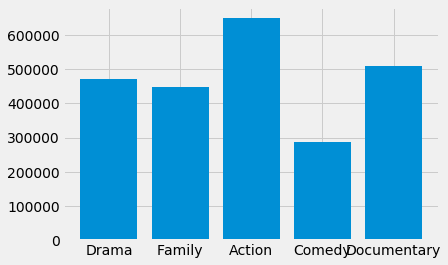

In [168]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(['Drama', 'Family', 'Action', 'Comedy', 'Documentary'], [Movie_drama['votes'].mean(), Movie_family['votes'].mean(), Movie_action['votes'].mean(), Movie_comedy['votes'].mean(), Movie_doc['votes'].mean()])


<BarContainer object of 5 artists>

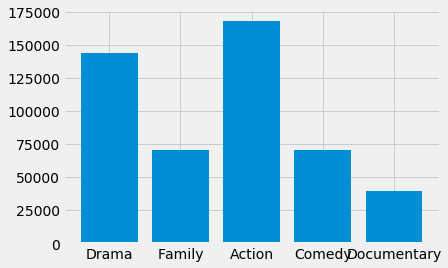

In [201]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(['Drama', 'Family', 'Action', 'Comedy', 'Documentary'], [TV_drama['votes'].mean(), TV_family['votes'].mean(), TV_action['votes'].mean(), TV_comedy['votes'].mean(), TV_doc['votes'].mean()])

Text(0.5, 0, 'Action  Comedy Documentary Drama Family')

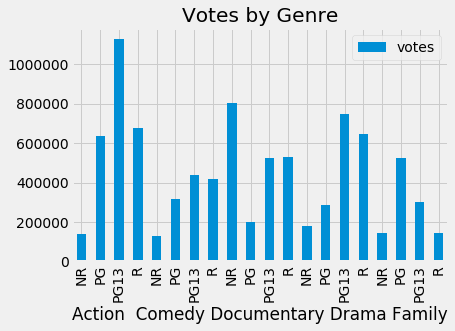

In [363]:
Moviegenre.plot(x='rating', y='votes', kind='bar')

plt.title('Votes by Genre')


plt.xlabel('Action  Comedy Documentary Drama Family')



In [1]:
Movie_drama.plot(x='score', y='votes', kind='scatter')

plt.title('Amount of Votes in Drama by Score')

plt.xticks(np.arange(8.5, 10))

plt.xlabel('User Rating Score');


NameError: name 'Movie_drama' is not defined

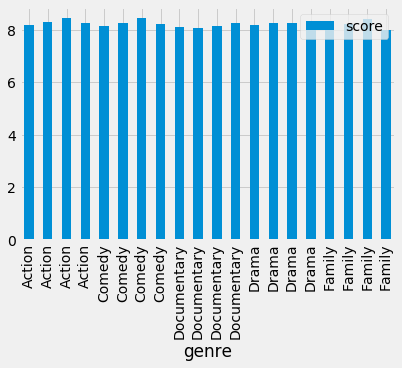

In [350]:
Moviegenre.plot(x='genre', y='score', kind='bar')